# 导库与函数

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve,average_precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold,cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings
from sklearn import svm
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import time
from joblib import dump,load
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'SongTi SC'
plt.rcParams['axes.unicode_minus'] = False
# Set random seed
np.random.seed(0)



In [6]:
def paintting(f, t, auc):
    # 绘制 ROC 曲线
    plt.plot(f, t, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [7]:
def calculator_index(model):
    y_pred = model.predict(test_feature)
    print(pd.DataFrame(confusion_matrix(test_target, y_pred), columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    #算指标
    probs_c = model.predict_proba(test_feature)
    fpr_c, tpr_c, thresholds_c = roc_curve(test_target, probs_c[:, 1])
    roc_auc_c = auc(fpr_c, tpr_c)
    
    print("accuracy:", accuracy_score(test_target, y_pred))
    print("precision:", precision_score(test_target, y_pred))
    print("recall:", recall_score(test_target, y_pred))
    print("roc_auc:", roc_auc_c)
    print("f1:", f1_score(test_target, y_pred))

    return y_pred, fpr_c, tpr_c, roc_auc_c



# 导入文件

In [8]:
df = pd.read_csv('creditcard.csv')

In [9]:
df = df.dropna()

In [10]:
feature = df.iloc[:,1:-1]
target = df.iloc[:,-1]
feature_value = feature.values
target_value = target.values

In [11]:
train_feature, test_feature, train_target, test_target = train_test_split(feature_value, target_value, test_size = 0.3)

# 无采样

## 随机森林

In [12]:
clf_rf1 = RandomForestClassifier(n_jobs = 2, random_state = 42,
                             max_depth = 10, max_features = 3, min_samples_split = 2, n_estimators = 50)
clf_rf1.fit(train_feature, train_target)

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=50, n_jobs=2,
                       random_state=42)

In [13]:
y_pred_clf_rf1, fpr_clf_rf1, tpr_clf_rf1, auc_clf_rf1 = calculator_index(clf_rf1)

     pred_neg  pred_pos
neg     85289         7
pos        40       107
accuracy: 0.9994499256814484
precision: 0.9385964912280702
recall: 0.7278911564625851
roc_auc: 0.9702331504727195
f1: 0.8199233716475096


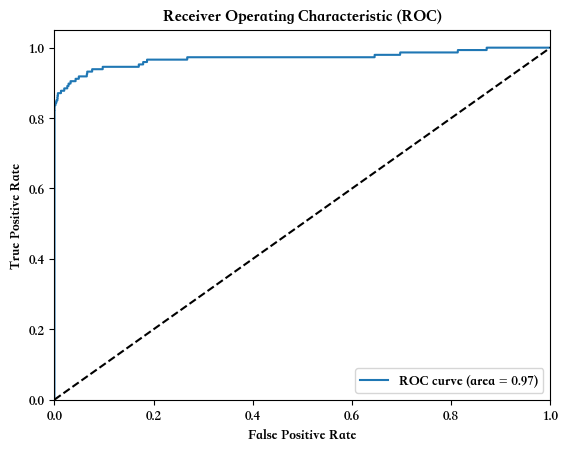

In [14]:
paintting(fpr_clf_rf1, tpr_clf_rf1, auc_clf_rf1)

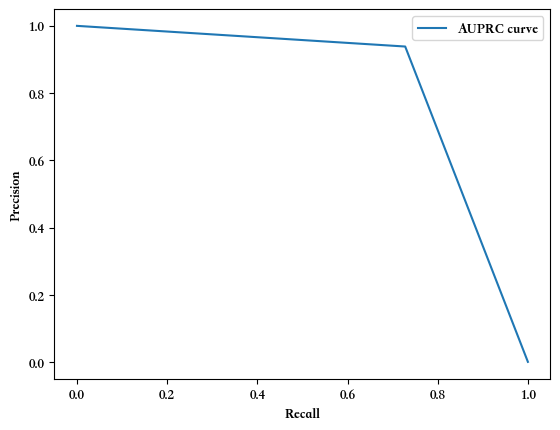

In [15]:
precision_rf1, recall_rf1, thresholds_rf1 = precision_recall_curve(test_target,clf_rf1.predict(test_feature))
plt.plot(recall_rf1, precision_rf1, label='AUPRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [16]:
auprc_rf1 = average_precision_score(test_target, clf_rf1.predict(test_feature))
print('AUPRC:', auprc_rf1)

AUPRC: 0.6836642338079387


## XGBoost

In [20]:
clf_xgb1 = xgb.XGBClassifier(max_depth = 9,
                       learning_rate = 0.1,
                        n_estimators = 150,
                       subsample = 1,
                       colsample_bytree = 1,
                       gamma = 0.1,
                       reg_alpha = 0,
                       reg_lambda = 1,
                       objective="binary:logistic")
clf_xgb1.fit(train_feature,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred_clf_xgb1, fpr_clf_xgb1, tpr_clf_xgb1, auc_clf_xgb1 = calculator_index(clf_xgb1)

     pred_neg  pred_pos
neg     85290         6
pos        32       115
accuracy: 0.9995552590615966
precision: 0.9504132231404959
recall: 0.782312925170068
roc_auc: 0.9771720121175462
f1: 0.8582089552238806


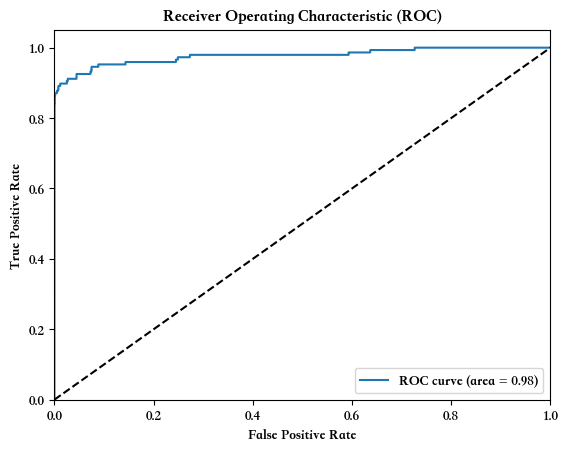

In [22]:
paintting(fpr_clf_xgb1, tpr_clf_xgb1, auc_clf_xgb1)

In [23]:
precision_xgb1, recall_xgb1, thresholds_xgb1 = precision_recall_curve(test_target,clf_xgb1.predict(test_feature))

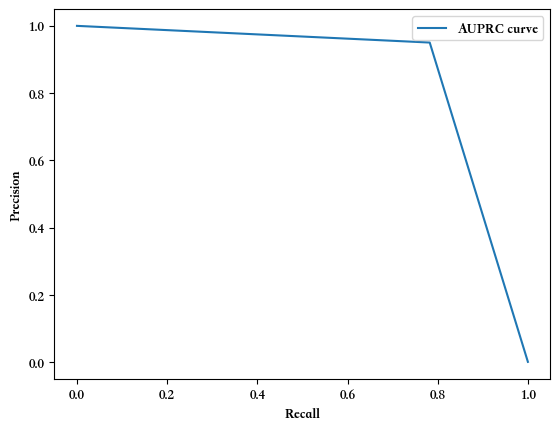

In [24]:
plt.plot(recall_xgb1, precision_xgb1, label='AUPRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [26]:
auprc_xgb1 = average_precision_score(test_target, clf_xgb1.predict(test_feature))
print('AUPRC:', auprc_xgb1)

AUPRC: 0.7438950674003252


# 采样

In [28]:
over_sampler = SMOTE(sampling_strategy=0.01)  
under_sampler = RandomUnderSampler(sampling_strategy=0.01) 
pipeline = Pipeline([
    ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])

x_resampled, y_resampled = pipeline.fit_resample(train_feature, train_target)

In [30]:
y_resampled.sum()

1990

In [31]:
len(y_resampled)

200990

## 随机森林

In [34]:
clf_rf2 = RandomForestClassifier(n_jobs = 2, random_state = 42,
                             max_depth = 10, max_features = 3, min_samples_split = 2, n_estimators = 50)
clf_rf2.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=50, n_jobs=2,
                       random_state=42)

In [35]:
y_pred_clf_rf2, fpr_clf_rf2, tpr_clf_rf2, auc_clf_rf2 = calculator_index(clf_rf2)

     pred_neg  pred_pos
neg     85289         7
pos        28       119
accuracy: 0.9995903701883126
precision: 0.9444444444444444
recall: 0.8095238095238095
roc_auc: 0.9782908051609314
f1: 0.8717948717948718


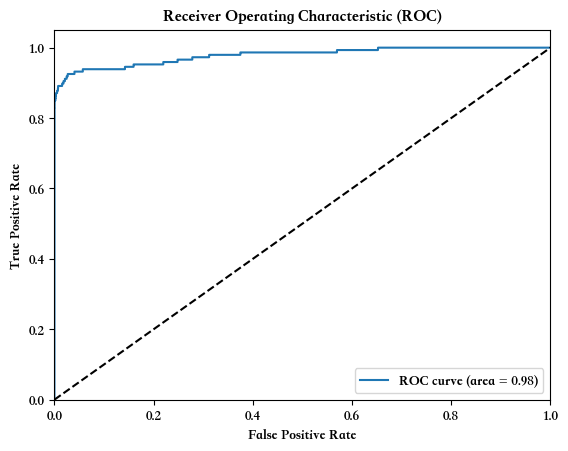

In [36]:
paintting(fpr_clf_rf2, tpr_clf_rf2, auc_clf_rf2)

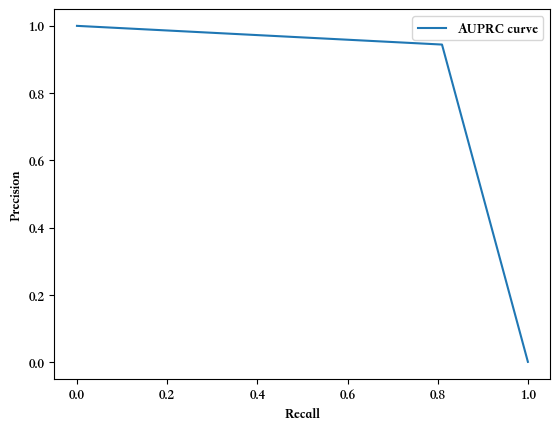

In [37]:
precision_rf2, recall_rf2, thresholds_rf2 = precision_recall_curve(test_target,clf_rf2.predict(test_feature))

plt.plot(recall_rf2, precision_rf2, label='AUPRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [38]:
auprc_rf2 = average_precision_score(test_target, clf_rf2.predict(test_feature))
print('AUPRC:', auprc_rf2)

AUPRC: 0.7648779683996144


## XGBoost

In [39]:
clf_xgb2 = xgb.XGBClassifier(max_depth = 9,
                       learning_rate = 0.1,
                        n_estimators = 150,
                       subsample = 1,
                       colsample_bytree = 1,
                       gamma = 0.1,
                       reg_alpha = 0,
                       reg_lambda = 1,
                       objective="binary:logistic")
clf_xgb2.fit(x_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_clf_xgb2, fpr_clf_xgb2, tpr_clf_xgb2, auc_clf_xgb2 = calculator_index(clf_xgb2)

     pred_neg  pred_pos
neg     85284        12
pos        26       121
accuracy: 0.9995552590615966
precision: 0.9097744360902256
recall: 0.8231292517006803
roc_auc: 0.9783550073565348
f1: 0.8642857142857143


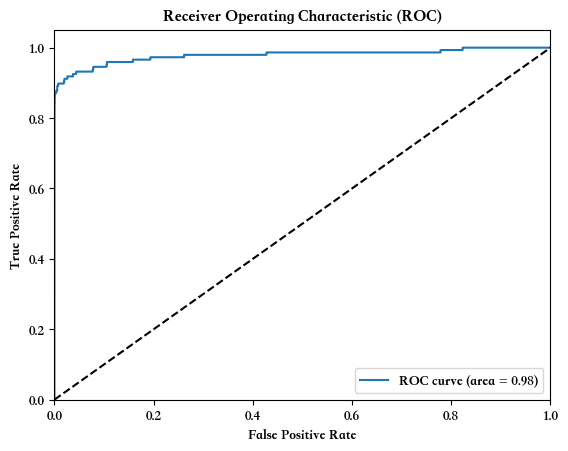

In [41]:
paintting(fpr_clf_xgb2, tpr_clf_xgb2, auc_clf_xgb2)

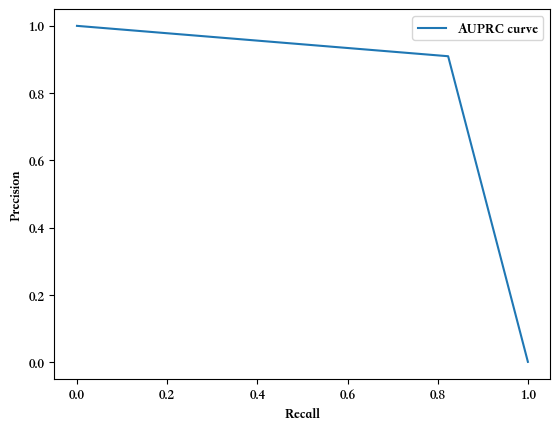

In [42]:
precision_xgb2, recall_xgb2, thresholds_xgb2 = precision_recall_curve(test_target,clf_xgb2.predict(test_feature))
plt.plot(recall_xgb2, precision_xgb2, label='AUPRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [43]:
auprc_xgb2 = average_precision_score(test_target, clf_xgb2.predict(test_feature))
print('AUPRC:', auprc_xgb2)

AUPRC: 0.749166247226895
